In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
import matplotlib.ticker as ticker
import pandas as pd
import os

def plot_scatter_combined(rsa_data, rouge_data1, rouge_data2, rsa_conditions, rouge_condition1, rouge_condition2, save_path, 
                          colors, title_fontsize=24, label_fontsize=24, tick_fontsize=24, text_fontsize=36):
    fig, axes = plt.subplots(1, 3, figsize=(42.5, 10), dpi=300)
    
    for i, (rsa, ax, color, rsa_condition) in enumerate(zip(rsa_data, axes, colors, rsa_conditions)):
        x = rsa
        y1 = rouge_data1
        y2 = rouge_data2

        # 创建双y轴
        ax2 = ax.twinx()

        # 第一个散点图和回归线 (左y轴)
        sns.regplot(x=x, y=y1, ax=ax, scatter_kws={"s": 70, "color": "black"}, 
                    line_kws={"color": color[0], "linewidth": 6}, ci=95)
        
        # 第二个散点图和回归线 (右y轴)
        sns.regplot(x=x, y=y2, ax=ax2, marker="D", scatter_kws={"s": 70, "color": "black"}, 
                    line_kws={"color": color[1], "linestyle": "--", "linewidth": 6}, ci=95)

        corr1, p_value1 = spearmanr(x, y1)
        corr2, p_value2 = spearmanr(x, y2)
        print(f"Correlation1: {corr1}, p-value1: {p_value1}")
        print(f"Correlation2: {corr2}, p-value2: {p_value2}")
        
        # 在左上角显示相关性和显著性，分两行
        ax.text(0.05, 0.95, f"$r_{{(a)}}$ = {corr1:.2f}, $p_{{(a)}}$ = {p_value1:.2e}\n$r_{{(n)}}$ = {corr2:.2f}, $p_{{(n)}}$ = {p_value2:.2e}", 
                transform=ax.transAxes, ha='left', va='top', fontsize=text_fontsize)
        
        ax.set_title(f"RSA: {rsa_condition}", fontsize=title_fontsize, pad=20)
        ax.set_xlabel("RSA Score", fontsize=label_fontsize)
        ax.set_ylabel(rouge_condition1, fontsize=label_fontsize)
        ax2.set_ylabel(rouge_condition2, fontsize=label_fontsize)
        
        # 设置y轴范围和刻度
        y1_min, y1_max = ax.get_ylim()
        y2_min, y2_max = ax2.get_ylim()
        
        # 使用相同数量的刻度
        num_ticks = 4
        y1_ticks = np.linspace(y1_min, y1_max, num_ticks)
        y2_ticks = np.linspace(y2_min, y2_max, num_ticks)
        
        ax.set_yticks(y1_ticks)
        ax2.set_yticks(y2_ticks)
        
        # 设置刻度格式为一位小数
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
        ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
        
        ax.tick_params(axis='both', labelsize=tick_fontsize)
        ax2.tick_params(axis='y', labelsize=tick_fontsize)
        
        ax.xaxis.set_major_locator(ticker.MaxNLocator(5))

        # 设置绘图风格
        sns.set_theme(style='darkgrid')
        ax.set_facecolor('#EEEEFF')
        sns.despine(ax=ax, right=False)
        sns.despine(ax=ax2, left=True)

        # 单独保存每个子图
        fig_single, ax_single = plt.subplots(figsize=(10, 7.5), dpi=300)
        ax_single.set_title(f"RSA: {rsa_condition}", fontsize=title_fontsize, pad=20)
        ax_single.set_xlabel("RSA Score", fontsize=label_fontsize)
        ax_single.set_ylabel(rouge_condition1, fontsize=label_fontsize)
        ax2_single = ax_single.twinx()
        ax2_single.set_ylabel(rouge_condition2, fontsize=label_fontsize)

        sns.regplot(x=x, y=y1, ax=ax_single, scatter_kws={"s": 50, "color": "black"}, 
                    line_kws={"color": color[0], "linewidth": 3}, ci=95)
        sns.regplot(x=x, y=y2, ax=ax2_single, marker='D', scatter_kws={"s": 50, "color": "black"}, 
                    line_kws={"color": color[1], "linestyle": "--", "linewidth": 3}, ci=95)

        ax_single.text(0.05, 0.95, f"$r_{{(a)}}$ = {corr1:.2f}, $p_{{(a)}}$ = {p_value1:.2e}\n$r_{{(n)}}$ = {corr2:.2f}, $p_{{(n)}}$ = {p_value2:.2e}", 
                       transform=ax_single.transAxes, ha='left', va='top', fontsize=text_fontsize)

        # 对单独的子图也设置相同的y轴范围和刻度
        ax_single.set_yticks(y1_ticks)
        ax2_single.set_yticks(y2_ticks)
        
        # 设置单独子图的刻度格式为一位小数
        ax_single.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
        ax_single.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
        ax2_single.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
        
        ax_single.tick_params(axis='both', labelsize=tick_fontsize)
        ax2_single.tick_params(axis='y', labelsize=tick_fontsize)
        ax_single.xaxis.set_major_locator(ticker.MaxNLocator(4))

        sns.set_theme(style='darkgrid')
        ax_single.set_facecolor('#EEEEFF')
        sns.despine(ax=ax_single, right=False)
        sns.despine(ax=ax2_single, left=True)

        plt.tight_layout()
        main_filename = os.path.splitext(os.path.basename(save_path))[0]
        single_save_path = os.path.join(os.path.dirname(save_path), f"{main_filename}_{rsa_condition}.png")
        fig_single.savefig(single_save_path)
        plt.close(fig_single)

    plt.subplots_adjust(wspace=0.5)
    # plt.tight_layout()
    fig.savefig(save_path)
    plt.show()
    plt.close(fig)


# 读取数据
rsa_df = pd.read_excel("data/BART_RSA.xlsx")
rouge_df = pd.read_excel("data/BART_Rouge.xlsx")

Correlation1: 0.8111888111888113, p-value1: 0.0013633152527271922
Correlation2: 0.7902097902097903, p-value2: 0.0022231354099909208
Correlation1: 0.7972027972027973, p-value1: 0.0019003677255282703
Correlation2: 0.7412587412587414, p-value2: 0.005801150474478243
Correlation1: 0.8111888111888113, p-value1: 0.0013633152527271922
Correlation2: 0.7272727272727274, p-value2: 0.007355028857805126


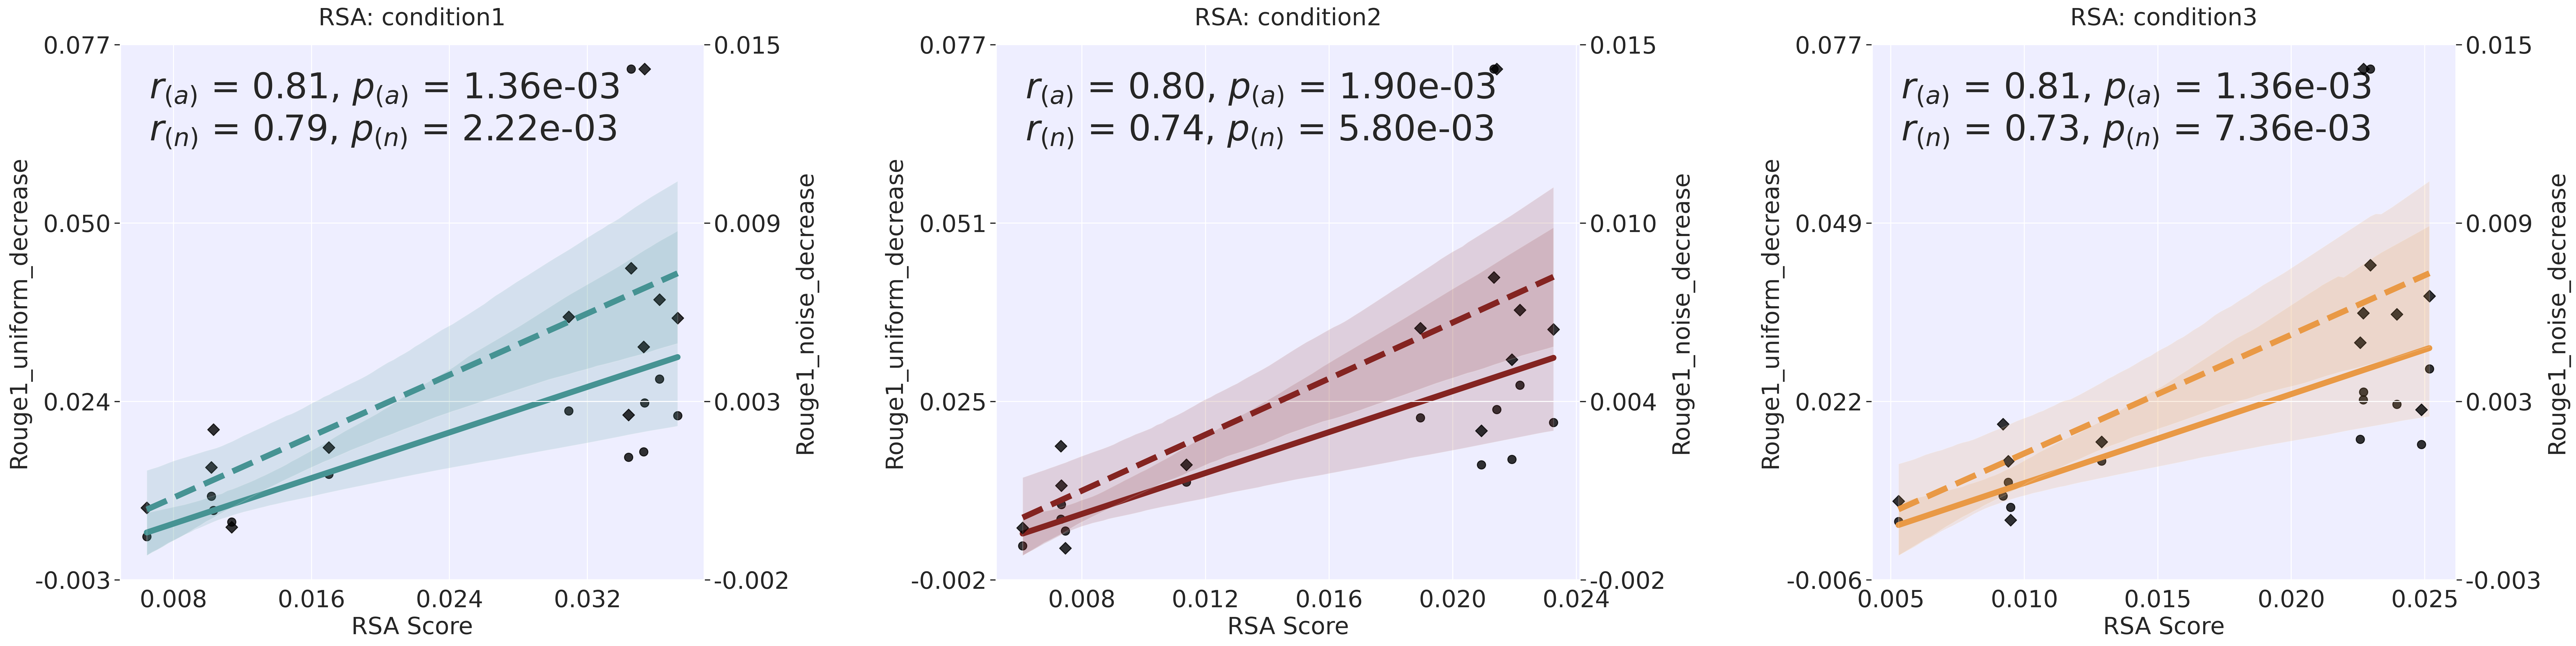

In [39]:
# 选择条件
rsa_conditions = ["condition1", "condition2", "condition3"]
rouge_condition1 = "Rouge1_uniform_decrease"
rouge_condition2 = "Rouge1_noise_decrease"

# 准备数据
rsa_data = [rsa_df[condition].values for condition in rsa_conditions]
rouge_data1 = rouge_df[rouge_condition1].values
rouge_data2 = rouge_df[rouge_condition2].values

# 定义每个子图的颜色
colors = [
    ('#469393', '#469393'),  # 第一个子图的颜色：蓝色和橙色
    ('#842421', '#842421'),  # 第二个子图的颜色：绿色和红色
    ('#E99945', '#E99945')   # 第三个子图的颜色：紫色和棕色
]

# 绘图
plot_scatter_combined(rsa_data, rouge_data1, rouge_data2, rsa_conditions, rouge_condition1, rouge_condition2, 
                      "pic/bart_rouge1.png", colors=colors)


Correlation1: 0.8041958041958043, p-value1: 0.001614768986069931
Correlation2: 0.8041958041958043, p-value2: 0.001614768986069931


Correlation1: 0.7692307692307694, p-value1: 0.0034464502618274493
Correlation2: 0.7762237762237763, p-value2: 0.0029928636801859797
Correlation1: 0.7272727272727274, p-value1: 0.007355028857805126
Correlation2: 0.7132867132867133, p-value2: 0.009201779777634755


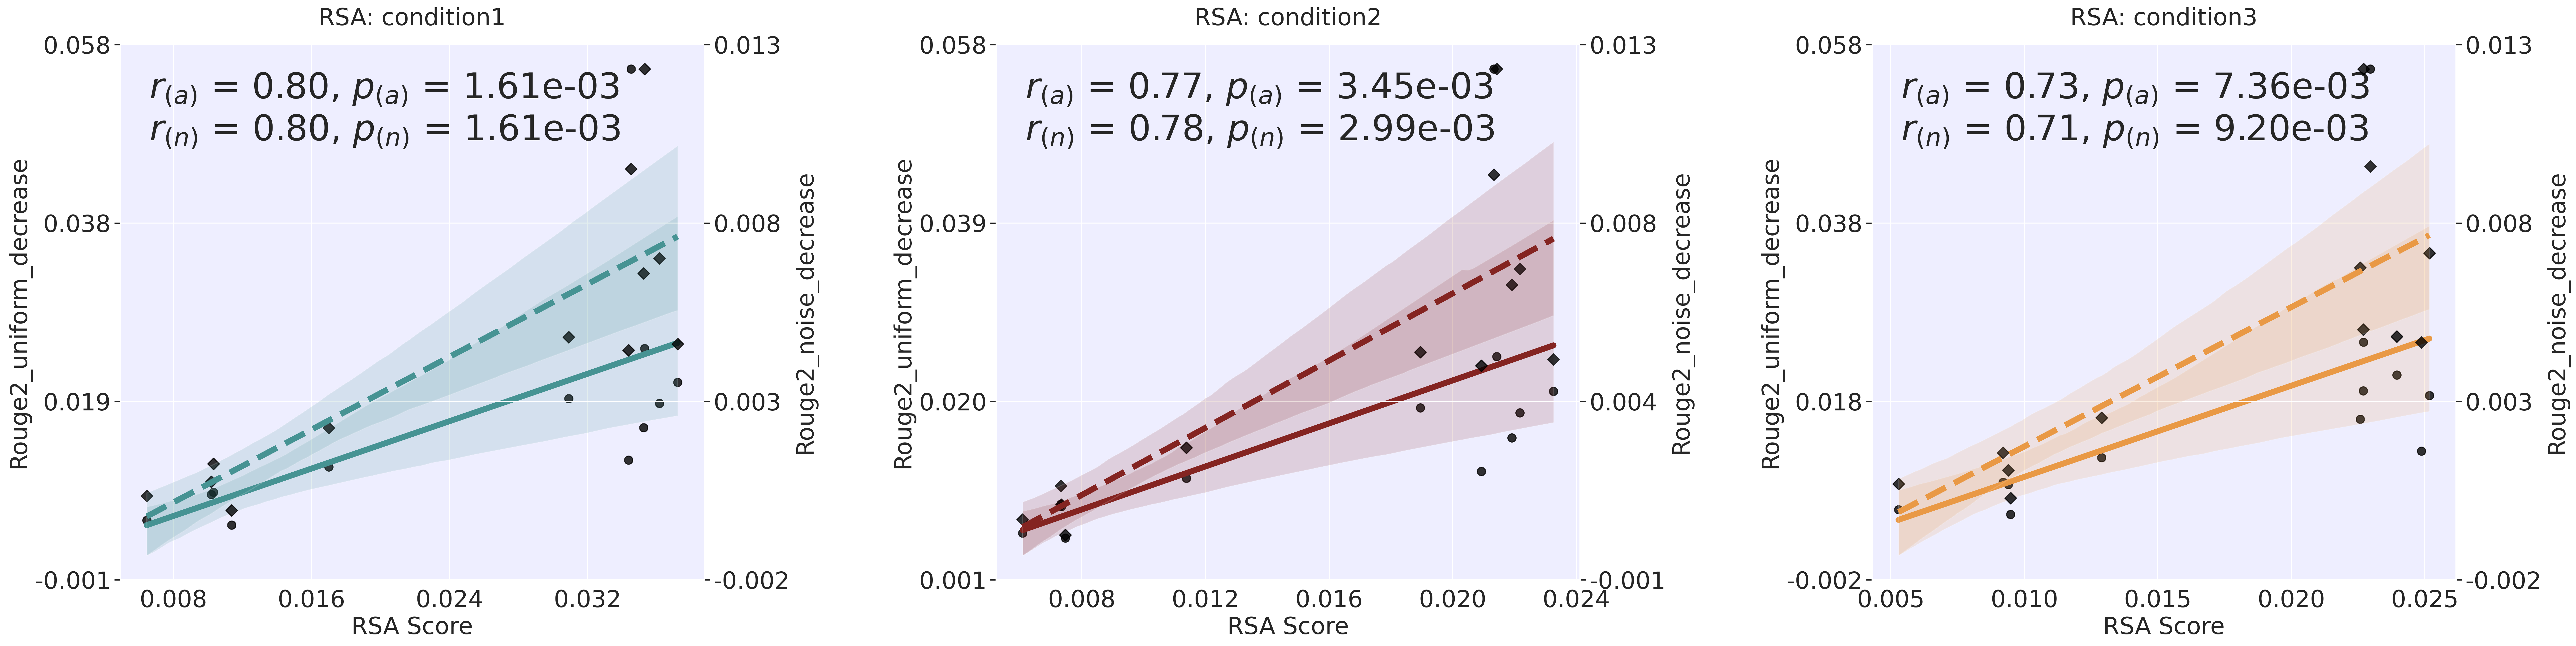

In [40]:
# 选择条件
rsa_conditions = ["condition1", "condition2", "condition3"]
rouge_condition1 = "Rouge2_uniform_decrease"
rouge_condition2 = "Rouge2_noise_decrease"

# 准备数据
rsa_data = [rsa_df[condition].values for condition in rsa_conditions]
rouge_data1 = rouge_df[rouge_condition1].values
rouge_data2 = rouge_df[rouge_condition2].values

# 定义每个子图的颜色
colors = [
    ('#469393', '#469393'),  # 第一个子图的颜色：蓝色和橙色
    ('#842421', '#842421'),  # 第二个子图的颜色：绿色和红色
    ('#E99945', '#E99945')   # 第三个子图的颜色：紫色和棕色
]

# 绘图
plot_scatter_combined(rsa_data, rouge_data1, rouge_data2, rsa_conditions, rouge_condition1, rouge_condition2, 
                      "pic/bart_rouge2.png", colors=colors)


Correlation1: 0.8531468531468532, p-value1: 0.00041811794041499725
Correlation2: 0.7902097902097903, p-value2: 0.0022231354099909208
Correlation1: 0.8391608391608393, p-value1: 0.0006428259886278202
Correlation2: 0.7412587412587414, p-value2: 0.005801150474478243
Correlation1: 0.8321678321678322, p-value1: 0.0007854416778536137
Correlation2: 0.7272727272727274, p-value2: 0.007355028857805126


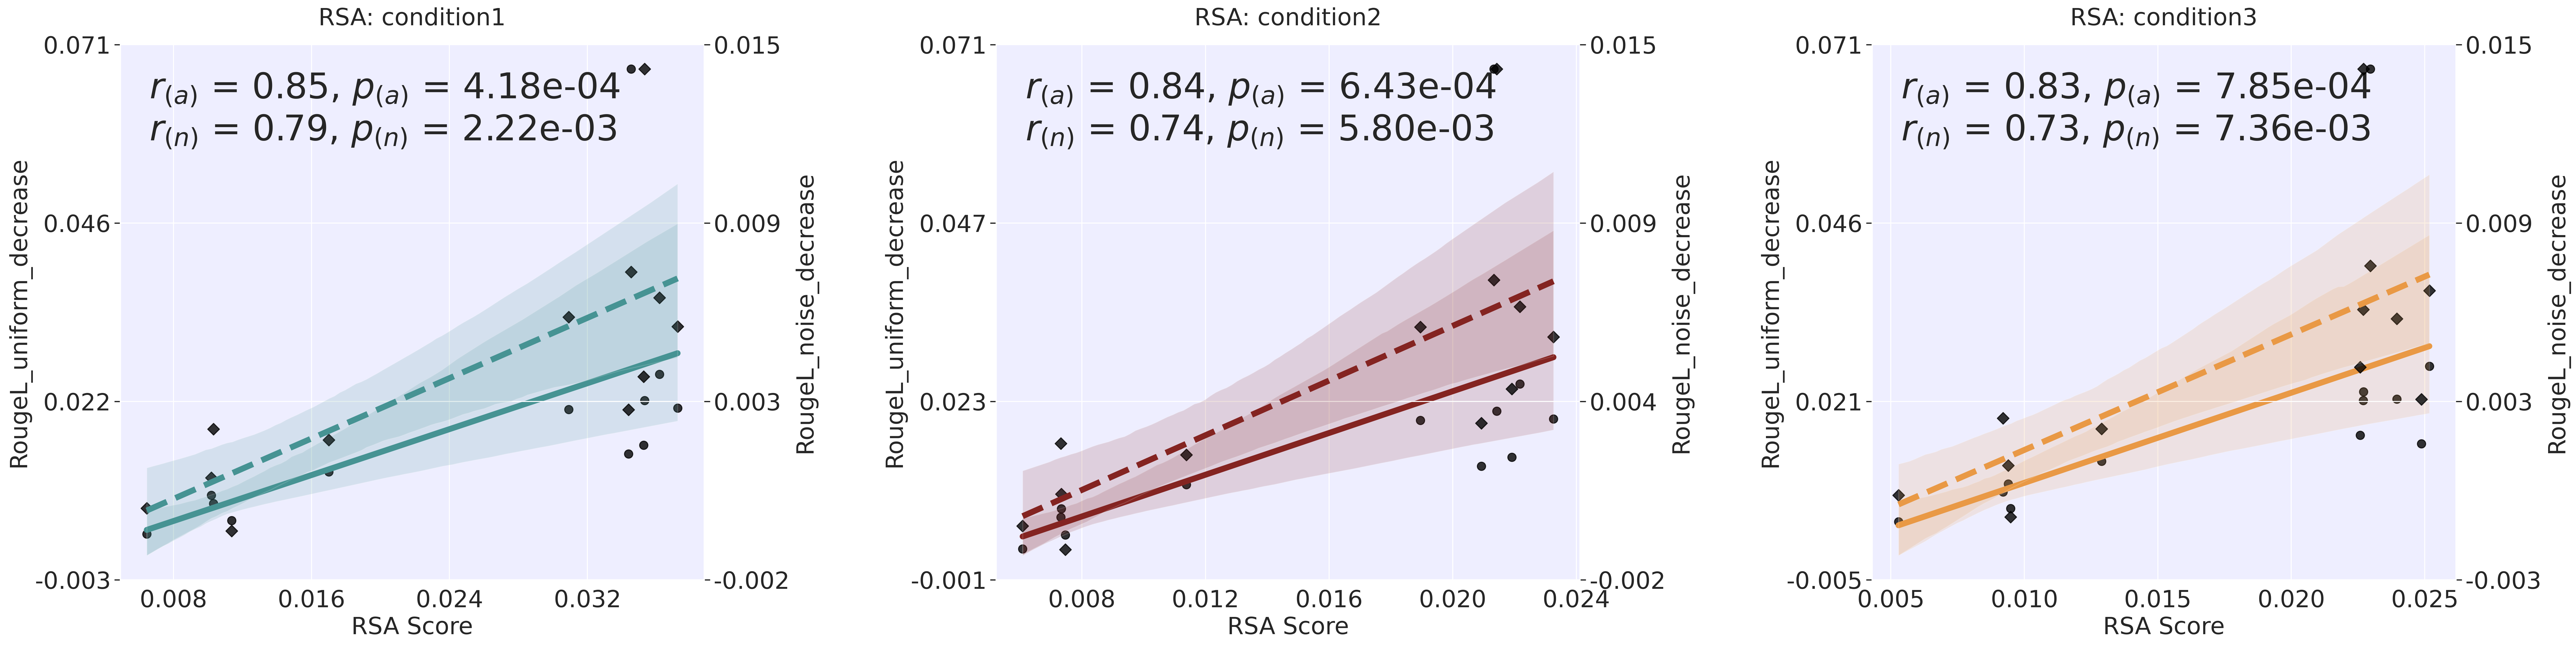

In [41]:
# 选择条件
rsa_conditions = ["condition1", "condition2", "condition3"]
rouge_condition1 = "RougeL_uniform_decrease"
rouge_condition2 = "RougeL_noise_decrease"

# 准备数据
rsa_data = [rsa_df[condition].values for condition in rsa_conditions]
rouge_data1 = rouge_df[rouge_condition1].values
rouge_data2 = rouge_df[rouge_condition2].values

# 定义每个子图的颜色
colors = [
    ('#469393', '#469393'),  # 第一个子图的颜色：蓝色和橙色
    ('#842421', '#842421'),  # 第二个子图的颜色：绿色和红色
    ('#E99945', '#E99945')   # 第三个子图的颜色：紫色和棕色
]

# 绘图
plot_scatter_combined(rsa_data, rouge_data1, rouge_data2, rsa_conditions, rouge_condition1, rouge_condition2, 
                      "pic/bart_rougeL.png", colors=colors)
